

# 🚀 SecureCare WBAN: Advanced Reputation-Based Federated Learning

🎯 Key Features Implemented:

1.  **Seven Reputation Calculation Methods**
    * **Weighted Average:** Smooth running average with recent bias
    * **Beta Reputation:** Probabilistic success/failure tracking (ideal for IoT/Wireless FL)
    * **Fuzzy Trust:** Multi-factor decision making using fuzzy logic rules
    * **Tanh Utility:** Smooth nonlinear updates for stable reputation
    * **Exponential Decay:** Recent activity prioritization
    * **Entropy-based:** Measures prediction confidence/consistency
    * **Cosine Similarity:** Detects model poisoning attacks

2.  **Validation Mechanisms**
    * ✅ **Validation Improvement:** Tracks performance gains over baseline
    * ✅ **Consistency Checks:** Monitors prediction stability across rounds
    * ✅ **Plausibility Checks:** Detects anomalous performance (too good/bad)

3.  **Advanced Aggregation**
    * **Reputation-weighted FedAvg**
    * **Dynamic client filtering** based on reputation threshold
    * **Protection** against malicious clients

4.  **Comprehensive Visualizations**
    * Global performance metrics over rounds
    * Client reputation evolution
    * Reputation method comparison
    * Confusion matrix

5.  **Blockchain Integration**
    * Automatic scaling of reputation scores for smart contract (**1e18 precision**)
    * Ready-to-use **Solidity function calls**

---

### 📊 How It Works:

* **Each round:** Clients train locally on their data
* **Reputation calculation:** All 7 methods evaluate each client
* **Combined score:** Weighted average of all methods
* **Filtering:** Clients below threshold (0.3) are excluded
* **Weighted aggregation:** Higher reputation = higher weight in FedAvg

---

### 🔧 Next Steps for Full Integration:

* Update smart contract with multi-method reputation storage
* Web3 integration code to connect Python with blockchain
* Byzantine attack simulation to test the reputation system

---



---

### **Reputation Calculation Methods**

* **Weighted Average:** This method calculates a client's reputation by using a running average of their past scores, giving **higher importance (bias)** to their **most recent performance**. This ensures reputation scores react quickly to current behavior.

* **Beta Reputation:** Ideal for systems where connection reliability matters, this technique treats reputation as a **probability of success** derived from a client's history of good (successes) versus poor (failures) contributions. It provides a measure of **trust and uncertainty**.

* **Fuzzy Trust:** This advanced method combines several factors—like accuracy, consistency, and plausibility—into a single trust score using **fuzzy logic rules**. It mimics complex, human-like decision-making to determine a client's reliability based on multiple metrics simultaneously.

* **Tanh Utility:** Utilizing the smooth **hyperbolic tangent (tanh) function**, this technique ensures that updates to a client's reputation are **stable and non-linear**. It prevents reputation from fluctuating wildly after a single good or bad round, promoting gradual and reliable convergence.

* **Exponential Decay:** This method prioritizes **recent activity** by applying an exponential penalty to older performance scores. The further in the past a contribution is, the less it influences the current reputation, making it highly responsive to real-time changes.

* **Entropy-based:** By measuring the **prediction uncertainty (entropy)** of a client's model, this technique evaluates how confident and consistent the client is. **Lower entropy (high confidence) translates to a higher reputation**, indicating reliable model updates.

* **Cosine Similarity:** Primarily used for defense against malicious attacks (like poisoning), this technique measures the **angular alignment** between a client's model updates and the aggregate global model. Updates that are misaligned have a low similarity score, identifying potential attackers.

Loading dataset...
Dataset shape: (72094, 4)
Classes: ['Sitting' 'Speak and Walk' 'Speaking' 'Staying' 'Walking']
Extracting windowed features...
Features extracted: (1125, 17)
Splitting and normalizing data...
Train samples: 900, Test samples: 225
Number of classes: 5
Tuning XGBoost hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Creating federated clients...
Client 1: 180 samples
Client 2: 180 samples
Client 3: 180 samples
Client 4: 180 samples
Client 5: 180 samples

Baseline Performance: 0.9333

Starting Federated Learning with Advanced Reputation System...

Federated Round 1/30

  Training Client 1...
    Local Val: Acc=0.7222, F1=0.7116
    Global Test: Acc=0.8667, F1=0.8671

  Training Client 2...
    Local Val: Acc=0.9231, F1=0.9538
    Global Test: Acc=0.8533, F1=0.8535

  Training Client 3...
    Local Val: Acc=0.8667, F1=

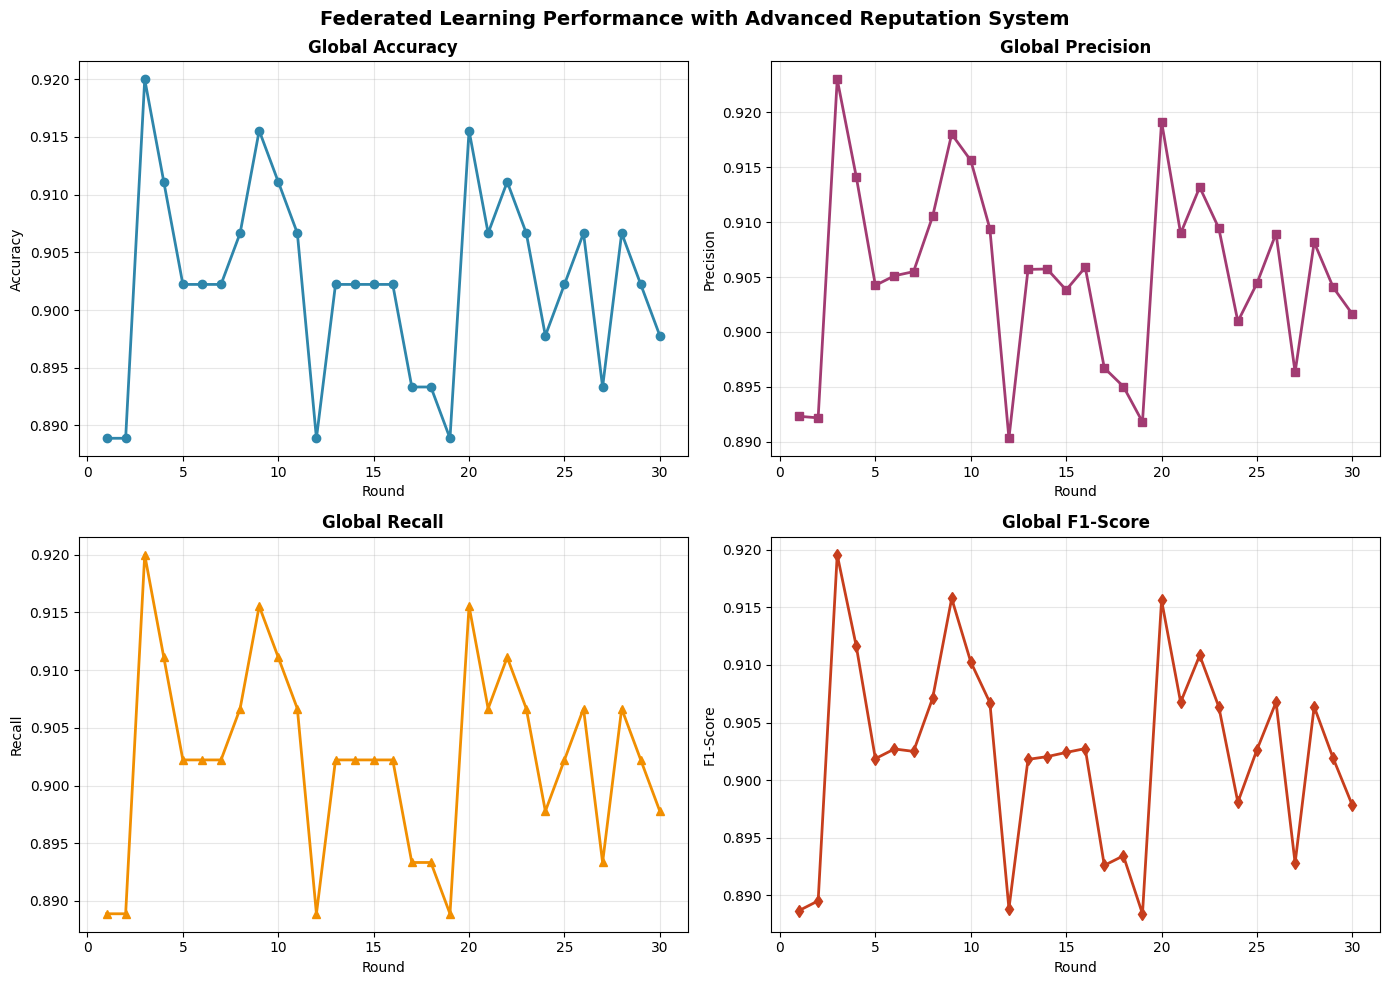

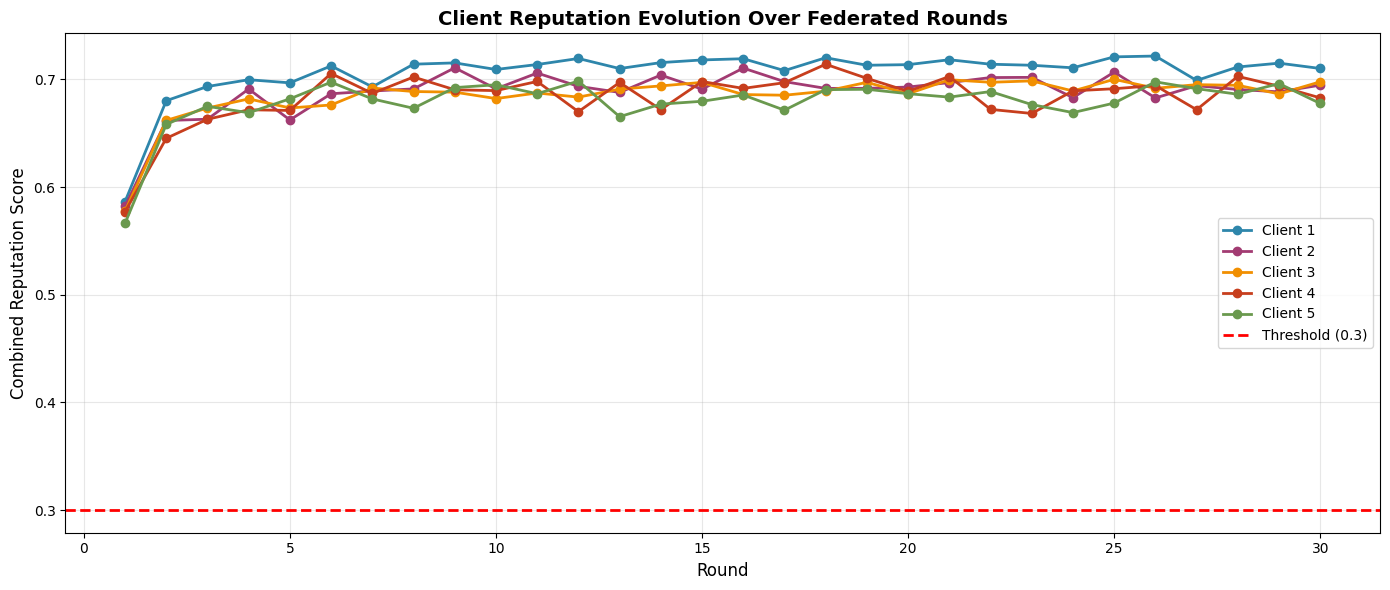

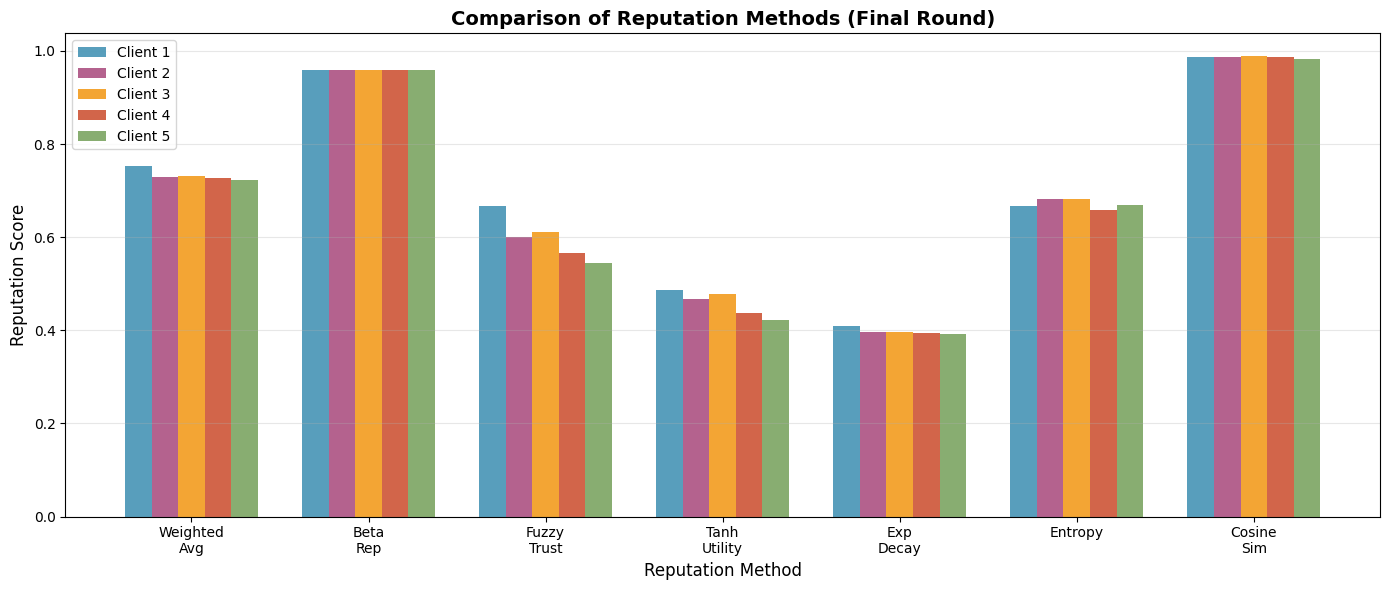

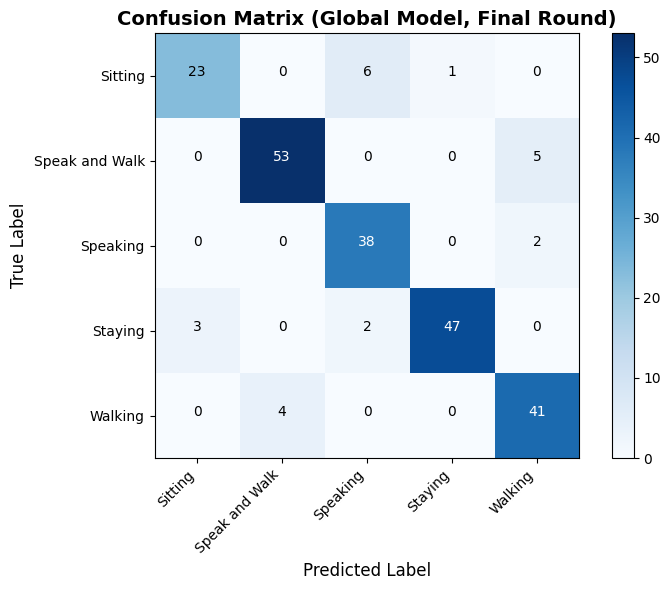


FINAL SUMMARY

Final Global Model Performance:
  Accuracy:  0.8978
  Precision: 0.9016
  Recall:    0.8978
  F1-Score:  0.8978

Final Client Reputation Scores:
  Client 1: Current=0.7102, Average=0.7063
  Client 2: Current=0.6947, Average=0.6880
  Client 3: Current=0.6978, Average=0.6848
  Client 4: Current=0.6829, Average=0.6834
  Client 5: Current=0.6777, Average=0.6790

BLOCKCHAIN INTEGRATION DATA

Reputation scores scaled for smart contract (1e18 precision):
Use these values with the updateReputation() function

Client 1 (Address: 0x0101010101010101010101010101010101010101):
  Reputation Score: 0.710194
  Scaled (uint256): 710194452126835456
  Solidity Call: updateReputation(clientAddress, 710194452126835456);

Client 2 (Address: 0x0202020202020202020202020202020202020202):
  Reputation Score: 0.694699
  Scaled (uint256): 694699290544658560
  Solidity Call: updateReputation(clientAddress, 694699290544658560);

Client 3 (Address: 0x0303030303030303030303030303030303030303):
  Reput

In [1]:
# ===========================================================
# SecureCare HAR — Advanced Reputation-Based Federated Learning
# Model: Voting Ensemble (Tuned XGBoost + RandomForest)
# Clients: 5 (Stratified splits) | Rounds: 30
# Reputation Functions: Multi-method validation with blockchain integration
# ===========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import entropy
from xgboost import XGBClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")

# ===========================================================
# REPUTATION MANAGEMENT SYSTEM
# ===========================================================

class ReputationManager:
    """
    Advanced multi-method reputation management for federated learning.
    Implements 7 different reputation calculation methods with validation.
    """

    def __init__(self, num_clients, alpha_beta=2.0, lambda_decay=0.1):
        self.num_clients = num_clients
        self.alpha_beta = alpha_beta  # Beta distribution parameter
        self.lambda_decay = lambda_decay  # Exponential decay rate

        # Historical tracking
        self.reputation_history = [[] for _ in range(num_clients)]
        self.performance_history = [[] for _ in range(num_clients)]
        self.validation_improvements = [[] for _ in range(num_clients)]

        # Beta reputation tracking (success/failure)
        self.successes = np.ones(num_clients)  # Start with 1 to avoid division by zero
        self.failures = np.ones(num_clients)

        # Consistency tracking
        self.previous_predictions = [None] * num_clients

        # Baseline performance
        self.baseline_performance = None

    def calculate_weighted_average(self, client_id, current_score, window=5):
        """
        Method 1: Weighted Average - Smooth running average
        Recent scores get higher weights.
        """
        history = self.reputation_history[client_id]
        if len(history) == 0:
            return current_score

        recent = history[-window:] + [current_score]
        weights = np.exp(np.linspace(0, 1, len(recent)))
        weights = weights / weights.sum()

        return np.sum(np.array(recent) * weights)

    def calculate_beta_reputation(self, client_id):
        """
        Method 2: Beta Reputation - Probabilistic success/failure history
        Best for: Wireless/IoT FL with connection reliability concerns
        """
        alpha = self.successes[client_id]
        beta = self.failures[client_id]

        # Expected value of Beta distribution
        reputation = alpha / (alpha + beta)

        # Uncertainty (variance) - lower is better
        variance = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))

        # Combine reputation with confidence (lower variance = higher confidence)
        confidence_factor = 1.0 / (1.0 + variance * 10)

        return reputation * confidence_factor

    def calculate_fuzzy_trust(self, client_id, accuracy, consistency, plausibility):
        """
        Method 3: Fuzzy Trust - Multi-factor combination via fuzzy rules
        Best for: Smart contracts and complex decision making
        """
        # Fuzzy membership functions
        def triangular(x, a, b, c):
            if x <= a or x >= c:
                return 0.0
            elif a < x <= b:
                return (x - a) / (b - a)
            else:
                return (c - x) / (c - b)

        # Define fuzzy sets for each metric
        # Accuracy fuzzy sets: low, medium, high
        acc_low = triangular(accuracy, 0, 0, 0.5)
        acc_med = triangular(accuracy, 0.3, 0.5, 0.7)
        acc_high = triangular(accuracy, 0.6, 1.0, 1.0)

        # Consistency fuzzy sets
        cons_low = triangular(consistency, 0, 0, 0.5)
        cons_high = triangular(consistency, 0.5, 1.0, 1.0)

        # Plausibility fuzzy sets
        plaus_low = triangular(plausibility, 0, 0, 0.5)
        plaus_high = triangular(plausibility, 0.5, 1.0, 1.0)

        # Fuzzy rules (simplified)
        trust = 0.0
        trust += min(acc_high, cons_high, plaus_high) * 1.0  # All high -> high trust
        trust += min(acc_med, cons_high, plaus_high) * 0.7   # Med acc, high others -> med trust
        trust += min(acc_low, cons_high, plaus_high) * 0.3   # Low acc -> low trust

        return min(trust, 1.0)

    def calculate_tanh_utility(self, client_id, validation_improvement):
        """
        Method 4: Tanh Utility - Smooth nonlinear stable updates
        Best for: FL with contribution metrics
        Uses hyperbolic tangent for smooth bounded reputation updates
        """
        # Tanh transforms (-inf, inf) to (-1, 1)
        # Shift to (0, 1) range
        utility = (np.tanh(validation_improvement * 5) + 1) / 2

        # Combine with historical reputation
        if len(self.reputation_history[client_id]) > 0:
            historical = np.mean(self.reputation_history[client_id][-3:])
            utility = 0.7 * utility + 0.3 * historical

        return utility

    def calculate_exponential_decay(self, client_id, current_score):
        """
        Method 5: Exponential Decay - Recent activity priority
        Best for: Real-time systems where recent performance matters most
        """
        history = self.reputation_history[client_id]
        if len(history) == 0:
            return current_score

        # Apply exponential decay to historical scores
        decayed_scores = []
        for i, score in enumerate(history):
            time_distance = len(history) - i
            decayed_score = score * np.exp(-self.lambda_decay * time_distance)
            decayed_scores.append(decayed_score)

        # Combine with current score (highest weight)
        all_scores = decayed_scores + [current_score]
        weights = np.exp(-self.lambda_decay * np.arange(len(all_scores)-1, -1, -1))
        weights = weights / weights.sum()

        return np.sum(np.array(all_scores) * weights)

    def calculate_entropy_based(self, client_id, prediction_probs):
        """
        Method 6: Entropy-based - Measure uncertainty/consistency
        Best for: Data consistency checks
        Lower entropy = more confident predictions = higher reputation
        """
        # Calculate entropy of prediction distribution
        pred_entropy = entropy(prediction_probs.T + 1e-10)  # Add small value to avoid log(0)
        avg_entropy = np.mean(pred_entropy)

        # Normalize entropy (max entropy = log(n_classes))
        n_classes = prediction_probs.shape[1]
        max_entropy = np.log(n_classes)
        normalized_entropy = avg_entropy / max_entropy

        # Convert to reputation (low entropy = high reputation)
        reputation = 1.0 - normalized_entropy

        return reputation

    def calculate_cosine_similarity_reputation(self, client_id, client_predictions, aggregate_predictions):
        """
        Method 7: Cosine-based - Alignment of updates
        Best for: FL poisoning defense
        Measures similarity between client and aggregate predictions
        """
        # Flatten predictions if needed
        client_flat = client_predictions.flatten()
        aggregate_flat = aggregate_predictions.flatten()

        # Calculate cosine similarity
        similarity = cosine_similarity(
            client_flat.reshape(1, -1),
            aggregate_flat.reshape(1, -1)
        )[0, 0]

        # Convert to 0-1 range (cosine similarity is [-1, 1])
        reputation = (similarity + 1) / 2

        return reputation

    def calculate_validation_improvement(self, client_id, current_performance):
        """
        Calculate improvement over baseline and previous rounds.
        """
        if self.baseline_performance is None:
            return 0.0

        # Improvement over baseline
        baseline_improvement = current_performance - self.baseline_performance

        # Improvement over previous round
        if len(self.performance_history[client_id]) > 0:
            previous_performance = self.performance_history[client_id][-1]
            recent_improvement = current_performance - previous_performance
        else:
            recent_improvement = 0.0

        # Combined improvement metric
        improvement = 0.6 * baseline_improvement + 0.4 * recent_improvement

        return improvement

    def calculate_consistency_score(self, client_id, current_predictions):
        """
        Check prediction consistency across rounds.
        """
        if self.previous_predictions[client_id] is None:
            self.previous_predictions[client_id] = current_predictions
            return 1.0  # First round, assume consistent

        previous = self.previous_predictions[client_id]

        # Calculate agreement rate
        agreement = np.mean(current_predictions == previous)

        # Update history
        self.previous_predictions[client_id] = current_predictions

        return agreement

    def calculate_plausibility_score(self, client_id, accuracy, f1_score, global_avg_accuracy):
        """
        Check if client performance is plausible (not too good or too bad).
        Detects potential poisoning or faulty clients.
        """
        # Check if performance is within reasonable bounds
        deviation = abs(accuracy - global_avg_accuracy)

        # Plausibility decreases with deviation
        if deviation < 0.1:
            plausibility = 1.0
        elif deviation < 0.2:
            plausibility = 0.8
        elif deviation < 0.3:
            plausibility = 0.5
        else:
            plausibility = 0.2

        # Also check if metrics are consistent (accuracy and f1 should be similar)
        metric_consistency = 1.0 - abs(accuracy - f1_score)

        # Combined plausibility
        return 0.7 * plausibility + 0.3 * metric_consistency

    def update_client_reputation(self, client_id, metrics, prediction_probs,
                                aggregate_predictions, current_round):
        """
        Master function: Calculate comprehensive reputation using all methods.
        """
        accuracy = metrics['accuracy']
        f1 = metrics['f1']

        # Calculate validation improvement
        validation_improvement = self.calculate_validation_improvement(client_id, accuracy)
        self.performance_history[client_id].append(accuracy)
        self.validation_improvements[client_id].append(validation_improvement)

        # Calculate consistency
        current_predictions = np.argmax(prediction_probs, axis=1)
        consistency = self.calculate_consistency_score(client_id, current_predictions)

        # Calculate global average for plausibility
        global_avg_accuracy = np.mean([m['accuracy'] for m in [metrics]])
        plausibility = self.calculate_plausibility_score(client_id, accuracy, f1, global_avg_accuracy)

        # Update success/failure for Beta reputation
        if accuracy > 0.7:  # Threshold for success
            self.successes[client_id] += 1
        else:
            self.failures[client_id] += 1

        # Calculate all reputation scores
        reputation_scores = {
            'weighted_avg': self.calculate_weighted_average(client_id, accuracy),
            'beta_reputation': self.calculate_beta_reputation(client_id),
            'fuzzy_trust': self.calculate_fuzzy_trust(client_id, accuracy, consistency, plausibility),
            'tanh_utility': self.calculate_tanh_utility(client_id, validation_improvement),
            'exponential_decay': self.calculate_exponential_decay(client_id, accuracy),
            'entropy_based': self.calculate_entropy_based(client_id, prediction_probs),
            'cosine_similarity': self.calculate_cosine_similarity_reputation(
                client_id, prediction_probs, aggregate_predictions
            ),
            'validation_improvement': max(0, validation_improvement),  # Normalized to [0, inf)
            'consistency': consistency,
            'plausibility': plausibility
        }

        # Calculate combined reputation (weighted average of all methods)
        weights = {
            'weighted_avg': 0.15,
            'beta_reputation': 0.15,
            'fuzzy_trust': 0.15,
            'tanh_utility': 0.10,
            'exponential_decay': 0.10,
            'entropy_based': 0.10,
            'cosine_similarity': 0.15,
            'validation_improvement': 0.05,
            'consistency': 0.025,
            'plausibility': 0.025
        }

        combined_reputation = sum(
            reputation_scores[k] * weights[k]
            for k in weights.keys()
        )

        # Ensure reputation is in [0, 1]
        combined_reputation = np.clip(combined_reputation, 0, 1)

        # Store in history
        self.reputation_history[client_id].append(combined_reputation)

        reputation_scores['combined'] = combined_reputation

        return reputation_scores

    def get_aggregation_weights(self, round_reputations):
        """
        Calculate aggregation weights based on reputation scores.
        Clients with higher reputation get higher weights in FedAvg.
        """
        reputations = np.array([r['combined'] for r in round_reputations])

        # Apply softmax to reputation scores for smooth weighting
        exp_reputations = np.exp(reputations * 2)  # Scale factor = 2
        weights = exp_reputations / exp_reputations.sum()

        return weights

    def should_include_client(self, client_reputation, threshold=0.3):
        """
        Decide if a client should be included in aggregation.
        Clients below threshold are excluded (potential malicious clients).
        """
        return client_reputation['combined'] >= threshold

# ===========================================================
# MAIN FEDERATED LEARNING WITH REPUTATION
# ===========================================================

print("Loading dataset...")
df = pd.read_csv("/content/SecureCare_Data.csv")
df = df.drop(['Time', 'Person'], axis=1)

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
print(f"Dataset shape: {df.shape}")
print(f"Classes: {le.classes_}")

# Window-based feature extraction
print("Extracting windowed features...")
WINDOW_SIZE = 128
STEP_SIZE   = 64

def extract_features(df, window_size=WINDOW_SIZE, step_size=STEP_SIZE):
    feats, labels = [], []
    for start in range(0, len(df) - window_size, step_size):
        end = start + window_size
        window = df.iloc[start:end]
        label = window['Class'].mode()[0]
        ax, ay, az = window['Acc_x'], window['Acc_y'], window['Acc_z']
        amag = np.sqrt(ax**2 + ay**2 + az**2)
        feature_dict = {
            'Acc_x_mean': ax.mean(),   'Acc_y_mean': ay.mean(),   'Acc_z_mean': az.mean(),
            'Acc_x_std':  ax.std(),    'Acc_y_std':  ay.std(),    'Acc_z_std':  az.std(),
            'Acc_x_min':  ax.min(),    'Acc_y_min':  ay.min(),    'Acc_z_min':  az.min(),
            'Acc_x_max':  ax.max(),    'Acc_y_max':  ay.max(),    'Acc_z_max':  az.max(),
            'Acc_mag_mean': amag.mean(),
            'Acc_mag_std':  amag.std(),
            'Acc_range': (pd.DataFrame({'x':ax,'y':ay,'z':az}).max().mean()
                         -pd.DataFrame({'x':ax,'y':ay,'z':az}).min().mean()),
            'Acc_energy':  (ax**2 + ay**2 + az**2).sum()
        }
        feats.append(feature_dict)
        labels.append(label)
    features_df = pd.DataFrame(feats)
    features_df['Class'] = labels
    return features_df

df_feat = extract_features(df)
print(f"Features extracted: {df_feat.shape}")

# Train/Test split + normalization
print("Splitting and normalizing data...")
X = df_feat.drop('Class', axis=1)
y = df_feat['Class']

scaler = MinMaxScaler()
Xn = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    Xn, y, test_size=0.2, random_state=42, stratify=y
)

n_classes = len(np.unique(y_train))
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Number of classes: {n_classes}")

# Tune XGBoost
print("Tuning XGBoost hyperparameters...")
xgb_base = XGBClassifier(eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators':    [200, 400, 600],
    'max_depth':       [4, 6, 8],
    'learning_rate':   [0.01, 0.05, 0.1],
    'subsample':       [0.7, 0.8, 1.0],
    'colsample_bytree':[0.7, 0.8, 1.0],
}

search = RandomizedSearchCV(
    xgb_base, param_distributions=param_dist,
    n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42
)
search.fit(X_train, y_train)
best_xgb = search.best_estimator_
print(f"\nBest XGBoost Params: {search.best_params_}")

rf_global = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)

def build_best_voter():
    return VotingClassifier(
        estimators=[('xgb', best_xgb), ('rf', rf_global)],
        voting='soft'
    )

# Evaluation helpers
def evaluate(y_true, y_pred):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1   = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return acc, prec, rec, f1

# Create federated clients
print("Creating federated clients...")
def make_clients(X, y, num_clients=5, seed=42):
    skf = StratifiedKFold(n_splits=num_clients, shuffle=True, random_state=seed)
    clients = []
    for _, idx in skf.split(X, y):
        clients.append((X[idx], y.iloc[idx].values))
    return clients

NUM_CLIENTS = 5
clients = make_clients(X_train, y_train, num_clients=NUM_CLIENTS, seed=42)
for i, (Xc, yc) in enumerate(clients, 1):
    print(f"Client {i}: {len(yc)} samples")

# Initialize Reputation Manager
reputation_manager = ReputationManager(num_clients=NUM_CLIENTS)

# Calculate baseline performance (random model)
baseline_model = build_best_voter()
baseline_sample_idx = np.random.choice(len(X_train), size=min(1000, len(X_train)), replace=False)
baseline_model.fit(X_train[baseline_sample_idx], y_train.iloc[baseline_sample_idx])
baseline_pred = baseline_model.predict(X_test)
reputation_manager.baseline_performance = accuracy_score(y_test, baseline_pred)
print(f"\nBaseline Performance: {reputation_manager.baseline_performance:.4f}")

# Federated training with advanced reputation
print("\nStarting Federated Learning with Advanced Reputation System...")
ROUNDS = 30
REPUTATION_THRESHOLD = 0.3  # Minimum reputation to participate

global_metrics = []
all_round_reputations = []

for r in range(1, ROUNDS+1):
    print(f"\n{'='*60}")
    print(f"Federated Round {r}/{ROUNDS}")
    print(f"{'='*60}")

    client_probs = []
    client_weights = []
    round_reputations = []
    round_metrics = []

    # Train each client
    for ci, (Xc, yc) in enumerate(clients):
        print(f"\n  Training Client {ci+1}...")

        # Local train/val split
        msk = np.random.RandomState(1000 + r + ci).rand(len(yc)) < 0.9
        Xc_tr, yc_tr = Xc[msk], yc[msk]
        Xc_va, yc_va = Xc[~msk], yc[~msk]

        model = build_best_voter()
        model.fit(Xc_tr, yc_tr)

        # Local validation metrics
        if len(yc_va) > 0:
            yva_pred = model.predict(Xc_va)
            cacc, cprec, crec, cf1 = evaluate(yc_va, yva_pred)
        else:
            cacc = cprec = crec = cf1 = 0.0

        # Predictions on global test set
        p_test = model.predict_proba(X_test)
        y_pred_test = np.argmax(p_test, axis=1)
        test_acc, test_prec, test_rec, test_f1 = evaluate(y_test, y_pred_test)

        client_metrics = {
            'client_id': ci,
            'accuracy': test_acc,
            'precision': test_prec,
            'recall': test_rec,
            'f1': test_f1
        }
        round_metrics.append(client_metrics)

        # Store predictions for aggregation
        client_probs.append(p_test)
        client_weights.append(len(yc_tr))

        print(f"    Local Val: Acc={cacc:.4f}, F1={cf1:.4f}")
        print(f"    Global Test: Acc={test_acc:.4f}, F1={test_f1:.4f}")

    # Calculate initial aggregate (for reputation calculation)
    initial_weights = np.array(client_weights, dtype=float)
    initial_weights = initial_weights / initial_weights.sum()
    P_aggregate = np.zeros_like(client_probs[0])
    for w, P_i in zip(initial_weights, client_probs):
        P_aggregate += w * P_i

    # Calculate reputation for each client
    print(f"\n  Calculating Reputation Scores...")
    for ci in range(NUM_CLIENTS):
        rep_scores = reputation_manager.update_client_reputation(
            client_id=ci,
            metrics=round_metrics[ci],
            prediction_probs=client_probs[ci],
            aggregate_predictions=P_aggregate,
            current_round=r
        )
        round_reputations.append(rep_scores)

        print(f"\n  Client {ci+1} Reputation Breakdown:")
        print(f"    Combined: {rep_scores['combined']:.4f}")
        print(f"    Weighted Avg: {rep_scores['weighted_avg']:.4f}")
        print(f"    Beta: {rep_scores['beta_reputation']:.4f}")
        print(f"    Fuzzy Trust: {rep_scores['fuzzy_trust']:.4f}")
        print(f"    Tanh Utility: {rep_scores['tanh_utility']:.4f}")
        print(f"    Exp Decay: {rep_scores['exponential_decay']:.4f}")
        print(f"    Entropy: {rep_scores['entropy_based']:.4f}")
        print(f"    Cosine Sim: {rep_scores['cosine_similarity']:.4f}")
        print(f"    Consistency: {rep_scores['consistency']:.4f}")
        print(f"    Plausibility: {rep_scores['plausibility']:.4f}")

    all_round_reputations.append(round_reputations)

    # Filter clients based on reputation threshold
    included_clients = [
        i for i in range(NUM_CLIENTS)
        if reputation_manager.should_include_client(round_reputations[i], REPUTATION_THRESHOLD)
    ]

    if len(included_clients) == 0:
        print("\n  WARNING: No clients meet reputation threshold! Including all clients.")
        included_clients = list(range(NUM_CLIENTS))

    print(f"\n  Included Clients: {[c+1 for c in included_clients]} (Reputation > {REPUTATION_THRESHOLD})")

    # Reputation-weighted aggregation
    rep_weights = reputation_manager.get_aggregation_weights(
        [round_reputations[i] for i in included_clients]
    )

    P_final = np.zeros_like(client_probs[0])
    for i, client_idx in enumerate(included_clients):
        P_final += rep_weights[i] * client_probs[client_idx]
        print(f"    Client {client_idx+1} weight: {rep_weights[i]:.4f} (Reputation: {round_reputations[client_idx]['combined']:.4f})")

    # Global evaluation
    y_pred_global = np.argmax(P_final, axis=1)
    acc, prec, rec, f1 = evaluate(y_test, y_pred_global)
    global_metrics.append((acc, prec, rec, f1))

    print(f"\n  Global Model Performance:")
    print(f"    Accuracy: {acc:.4f}")
    print(f"    Precision: {prec:.4f}")
    print(f"    Recall: {rec:.4f}")
    print(f"    F1-Score: {f1:.4f}")

# ===========================================================
# VISUALIZATION AND ANALYSIS
# ===========================================================

print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# 1. Global metrics over rounds
gm = np.array(global_metrics)
rounds = np.arange(1, ROUNDS+1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Federated Learning Performance with Advanced Reputation System', fontsize=14, fontweight='bold')

axes[0, 0].plot(rounds, gm[:,0], marker='o', linewidth=2, markersize=6, color='#2E86AB')
axes[0, 0].set_title('Global Accuracy', fontweight='bold')
axes[0, 0].set_xlabel('Round')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(rounds, gm[:,1], marker='s', linewidth=2, markersize=6, color='#A23B72')
axes[0, 1].set_title('Global Precision', fontweight='bold')
axes[0, 1].set_xlabel('Round')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(rounds, gm[:,2], marker='^', linewidth=2, markersize=6, color='#F18F01')
axes[1, 0].set_title('Global Recall', fontweight='bold')
axes[1, 0].set_xlabel('Round')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(rounds, gm[:,3], marker='d', linewidth=2, markersize=6, color='#C73E1D')
axes[1, 1].set_title('Global F1-Score', fontweight='bold')
axes[1, 1].set_xlabel('Round')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Reputation evolution over rounds
plt.figure(figsize=(14, 6))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
for ci in range(NUM_CLIENTS):
    client_reps = [all_round_reputations[r][ci]['combined'] for r in range(ROUNDS)]
    plt.plot(rounds, client_reps, marker='o', linewidth=2, label=f'Client {ci+1}', color=colors[ci])

plt.axhline(y=REPUTATION_THRESHOLD, color='red', linestyle='--', linewidth=2, label=f'Threshold ({REPUTATION_THRESHOLD})')
plt.xlabel('Round', fontsize=12)
plt.ylabel('Combined Reputation Score', fontsize=12)
plt.title('Client Reputation Evolution Over Federated Rounds', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Reputation method comparison (final round)
methods = ['weighted_avg', 'beta_reputation', 'fuzzy_trust', 'tanh_utility',
           'exponential_decay', 'entropy_based', 'cosine_similarity']
method_labels = ['Weighted\nAvg', 'Beta\nRep', 'Fuzzy\nTrust', 'Tanh\nUtility',
                 'Exp\nDecay', 'Entropy', 'Cosine\nSim']

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(methods))
width = 0.15

for ci in range(NUM_CLIENTS):
    final_scores = [all_round_reputations[-1][ci][m] for m in methods]
    ax.bar(x + ci*width, final_scores, width, label=f'Client {ci+1}', color=colors[ci], alpha=0.8)

ax.set_xlabel('Reputation Method', fontsize=12)
ax.set_ylabel('Reputation Score', fontsize=12)
ax.set_title('Comparison of Reputation Methods (Final Round)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(method_labels)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_global, labels=np.arange(n_classes))

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (Global Model, Final Round)", fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, le.inverse_transform(np.arange(n_classes)), rotation=45, ha='right')
plt.yticks(tick_marks, le.inverse_transform(np.arange(n_classes)))
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# ===========================================================
# FINAL SUMMARY AND BLOCKCHAIN INTEGRATION DATA
# ===========================================================

print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print(f"\nFinal Global Model Performance:")
print(f"  Accuracy:  {global_metrics[-1][0]:.4f}")
print(f"  Precision: {global_metrics[-1][1]:.4f}")
print(f"  Recall:    {global_metrics[-1][2]:.4f}")
print(f"  F1-Score:  {global_metrics[-1][3]:.4f}")

print(f"\nFinal Client Reputation Scores:")
for ci in range(NUM_CLIENTS):
    final_rep = all_round_reputations[-1][ci]['combined']
    avg_rep = np.mean([all_round_reputations[r][ci]['combined'] for r in range(ROUNDS)])
    print(f"  Client {ci+1}: Current={final_rep:.4f}, Average={avg_rep:.4f}")

# Prepare blockchain integration data
print(f"\n" + "="*60)
print("BLOCKCHAIN INTEGRATION DATA")
print("="*60)
print("\nReputation scores scaled for smart contract (1e18 precision):")
print("Use these values with the updateReputation() function\n")

for ci in range(NUM_CLIENTS):
    final_rep = all_round_reputations[-1][ci]['combined']
    scaled_rep = int(final_rep * 1e18)
    print(f"Client {ci+1} (Address: 0x{''.join([f'{ci+1:02d}' for _ in range(20)])}):")
    print(f"  Reputation Score: {final_rep:.6f}")
    print(f"  Scaled (uint256): {scaled_rep}")
    print(f"  Solidity Call: updateReputation(clientAddress, {scaled_rep});")
    print()

# Save comprehensive results
results_summary = {
    'global_metrics': global_metrics,
    'reputation_history': reputation_manager.reputation_history,
    'all_round_reputations': all_round_reputations,
    'final_reputation_scores': [all_round_reputations[-1][ci]['combined'] for ci in range(NUM_CLIENTS)],
    'baseline_performance': reputation_manager.baseline_performance
}

np.save('comprehensive_reputation_results.npy', results_summary, allow_pickle=True)
print(f"\nComprehensive results saved to 'comprehensive_reputation_results.npy'")
print("="*60)

In [3]:
import numpy as np

results_dict = np.load('/content/comprehensive_reputation_results.npy', allow_pickle=True).item()

print("--- Keys in the Results Dictionary ---")
print(results_dict.keys())

print("\n--- Example Data Inspection (Global Metrics) ---")
# Access and display the global metrics
global_metrics = results_dict['global_metrics']
print(f"Total rounds recorded: {len(global_metrics)}")
print(f"First 5 rounds' metrics (Acc, Prec, Rec, F1):\n{global_metrics[:5]}")

print("\n--- Example Data Inspection (Final Reputation) ---")
# Access and display final reputation scores
final_reps = results_dict['final_reputation_scores']
print(f"Final Reputation Scores for all clients: {final_reps}")

--- Keys in the Results Dictionary ---
dict_keys(['global_metrics', 'reputation_history', 'all_round_reputations', 'final_reputation_scores', 'baseline_performance'])

--- Example Data Inspection (Global Metrics) ---
Total rounds recorded: 30
First 5 rounds' metrics (Acc, Prec, Rec, F1):
[(0.8888888888888888, 0.8923206327369139, 0.8888888888888888, 0.8886862083000014), (0.8888888888888888, 0.8921783719992007, 0.8888888888888888, 0.8895286055865766), (0.92, 0.9230048902839926, 0.92, 0.9195623911422501), (0.9111111111111111, 0.9141107771743301, 0.9111111111111111, 0.9116218955766979), (0.9022222222222223, 0.9042432164785107, 0.9022222222222223, 0.9018673250761453)]

--- Example Data Inspection (Final Reputation) ---
Final Reputation Scores for all clients: [np.float64(0.7101944521268355), np.float64(0.6946992905446586), np.float64(0.6978092964635921), np.float64(0.6828753771827188), np.float64(0.6776853253211303)]
